In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [116]:
#EXERCICI 1    EXERCICI 2   EXERCICI 3     EXERCICI 4   EXERCICI 5

#Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.
#Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.
#Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.
#Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.
#Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [117]:
df=pd.read_csv('C:\\Users\\client277192\\Documents\\01-IT ACADEMY. DATA SCIENCE\\MODELOS CLASIFICACION\\M7\\wineData.txt')
df.columns=['Wine','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue', '...of diluted wines', 'Proline'] 
df.head(5)  

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,...of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  177 non-null    int64  
 1   Alcohol               177 non-null    float64
 2   Malic acid            177 non-null    float64
 3   Ash                   177 non-null    float64
 4   Alcalinity of ash     177 non-null    float64
 5   Magnesium             177 non-null    int64  
 6   Total phenols         177 non-null    float64
 7   Flavanoids            177 non-null    float64
 8   Nonflavanoid phenols  177 non-null    float64
 9   Proanthocyanins       177 non-null    float64
 10  Color intensity       177 non-null    float64
 11  Hue                   177 non-null    float64
 12  ...of diluted wines   177 non-null    float64
 13  Proline               177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [119]:
df.shape

(177, 14)

In [120]:
df.describe()

,Wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,...of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [121]:
muestras_unicas=df['Wine'].value_counts()
muestras_unicas

Wine
2    71
1    58
3    48
Name: count, dtype: int64

In [122]:
#MODELO RANDOM FOREST

#se ha aplicado el modelo Random Forest. Nos da una accuracy, precision y recall es 92,59%. 
#se ha valorado por la matrix de confusión y la valoración cruzada. Ha dado buenos resultados 97,76%
#Para mejorar el modelo se ha ajustado por hiperparametros, lo cual nos ha mejorado la predicción hasta un 97,88%


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import randint

In [128]:
#separamos los datos para entrenamiento y test

x=df.drop('Wine', axis=1)
y=df['Wine']

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3)

In [129]:
#creo el modelo y lo entreno

rf=RandomForestClassifier()
rf.fit(x_train, y_train)        #fit entrena el modelo para minimizar el error


RandomForestClassifier()

In [132]:
#hago las predicciones

y_pred=rf.predict(x_test)

In [133]:
#hago la validación. Me da valores de 1 lo qual es un poco raro. Miro otras formas de valoración 

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)

accuracy: 0.9629629629629629
precision: 0.9629629629629629
recall: 0.9629629629629629


In [134]:
#validación por valoración cruzada
from sklearn.model_selection import cross_val_score

scores=cross_val_score(rf,x,y,cv=5)

print("La valoración cruzada da:", scores)
print("la valoración cruzada promedio da:", scores.mean())
print('nos da un buen resultado para todas las columnas')

La valoración cruzada da: [0.97222222 0.94444444 0.97142857 1.         0.97142857]
la valoración cruzada promedio da: 0.9719047619047618
nos da un buen resultado para todas las columnas


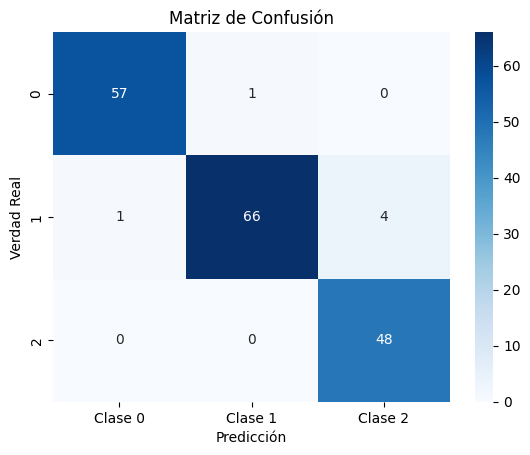

In [ ]:
#validación por matriz de confusión

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

#creo las predicciones
y_pred=cross_val_predict(rf,x,y,cv=5)

#creo matriz de confusion
conf_matrix = confusion_matrix(y, y_pred)

#visualizo la matriz de confusión

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Predicción')
plt.ylabel('Verdad Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
#nos da valores relativamente altos en la diagonal y fuera de ella valores muy pequeños por lo que el modelo es bueno

In [135]:
#Ajuste de Hiperparametros para el modelo para mejorar el rendimiento

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [136]:
#defino espacio de busqueda de hiperparametros

param_dist = {'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)
    }

#creo el modelo

rf_model = RandomForestClassifier()


#creo busqueda aleatoria para encontrar los mejores hiperparametros

rand_search = RandomizedSearchCV( rf_model, 
    param_distributions=param_dist, 
    n_iter=5,  # Número de combinaciones de hiperparámetros a probar
    cv=5,  # Número de pliegues en la validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    random_state=42)

rand_search.fit(x_train, y_train)       #entreno el modelo


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002289297B890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002288D8FA5D0>},
                   random_state=42, scoring='accuracy')

In [137]:
#creo la variable para el mejor modelo

best_rf_model = rand_search.best_estimator_
#.predict(x_test)


In [138]:
best_rf_model

RandomForestClassifier(max_depth=7, n_estimators=485)

In [140]:
#genero predicciones con el best_rf_model

y_pred = best_rf_model.predict(x_test)


In [141]:
#valido el resultado con accuray, precision y recall. Da 1 lo qual es un poco raro. Busco otros metodos de valoración

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)



accuracy: 0.9814814814814815
precision: 0.9814814814814815
recall: 0.9814814814814815


In [ ]:
#valido el resultado con validación cruzada

best_rf_model_rf_model = rand_search.best_estimator_
accuracy_scores1 = cross_val_score(best_rf_model, x_train, y_train, cv=5, scoring='accuracy')
print('la precision promedio en la validación cruzada:', accuracy_scores1.mean())
print('en este caso el haber hecho el ajuste de hiperparametros no ha mejorado nuestro modelo de predicción')

la precision promedio en la validación cruzada: 0.9788177339901478
en este caso el haber hecho el ajuste de hiperparametros no ha mejorado nuestro modelo de predicción


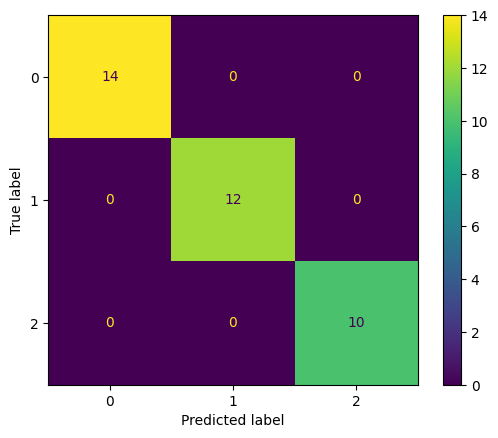

In [ ]:
#matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_rf_model_rf_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();


In [ ]:
#MODELO XGBoots.

#se ha aplicado el modelo XGBoots. Nos da una precisión del 88,89%. Se han normalizado los datos para intentar obtener
#mas precisión a un 92,59%. Se ha ajustado por hiperparametros y ha aumentado ls precisión hasta el 94,44%
#se ha mirado la importancia de los datos de las columnas para el resultado final viendo que   ...of diluted wines tiene 
#demasiada influencia. Se ha hecho un modelo sin esta columna para ver si el resultado era mejor  y se ha podido llegar 
#a un % de precisión del 97,22%

import xgboost as xgb

#creo y entreno el modelo

x1=df.drop('Wine', axis=1)
y1=df['Wine']

y1=y1-1   #las etiquetas son 0,1,2, por ello resto 1 para que empiece por 0
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
num_classes = len(set(y1))       #es el numero unico de clases del conjunto de y

xgboost_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=70)
xgboost_model.fit(x_train1, y_train1)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
#hacemos la prediccion
y_pred1 = xgboost_model.predict(x_test1)

In [ ]:
#validamos el modelo. Nos da resultados de 0,888 

accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='micro')
recall = recall_score(y_test1, y_pred1, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888


In [142]:
#como el modelo no es muy preciso, voy a normalizar los datos

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

x_train2, x_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.3, random_state=42)

scaler=StandardScaler()

x_train_normalized = scaler.fit_transform(x_train2)
x_test_normalized = scaler.transform(x_test2)

In [144]:
#creo y entreno el modelo

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)), seed=42)
xgb_model.fit(x_train_normalized, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [145]:
#realizo predicciones

y_predic2 = xgb_model.predict(x_test_normalized)

In [146]:
#valido el modelo despues de la normalización y  mejora

accuracy = accuracy_score(y_test2, y_predic2)
precision = precision_score(y_test2, y_predic2, average='micro')
recall = recall_score(y_test2, y_predic2, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


print(f'Precisión del modelo: {accuracy}')
print('no mejora el modelo')

Accuracy: 0.9259259259259259
Precision: 0.9259259259259259
Recall: 0.9259259259259259
Precisión del modelo: 0.9259259259259259
no mejora el modelo


In [147]:
# intento mejorar con hiperparametros


param_dist = {'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)}

#creo el modelo

rf_model = RandomForestClassifier()


#creo el objeto randomizedsearchCV
rand_search = RandomizedSearchCV( rf_model, 
    param_distributions=param_dist, 
    n_iter=5,  # Número de combinaciones de hiperparámetros a probar
    cv=5,  # Número de pliegues en la validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    random_state=42)

rand_search.fit(x_train2, y_train2)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002289296AF90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002289000BD90>},
                   random_state=42, scoring='accuracy')

In [148]:
#hago la prediccion

y_pred0 = rand_search.best_estimator_.predict(x_test2)

In [149]:
#valido el resultado

accuracy2=accuracy_score(y_test2, y_pred0)
print("Accuracy:", accuracy2)
print('buscando los hiperparametros se ha ajustado bastante el modelo, ha pasado de 88,8% a 94,4%')


Accuracy: 0.9444444444444444
buscando los hiperparametros se ha ajustado bastante el modelo, ha pasado de 88,8% a 94,4%


In [ ]:
#hago una valoración cruzada para validar la precisión de cada columna en el modelo

from sklearn.model_selection import cross_val_score, StratifiedKFold

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y1)), seed=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(xgb_model, x1, y1, cv=cv, scoring='accuracy')

print(f'Precisión en cada pliegue: {cross_val_results}')
print(f'Precisión promedio: {cross_val_results.mean()}')
print(f'nos da una buena valoración')

Precisión en cada pliegue: [0.97222222 0.97222222 0.97142857 0.94285714 0.94285714]
Precisión promedio: 0.9603174603174602
nos da una buena valoración


In [ ]:
#voy a mirar la importancia de las caracteristicas de la base de datos

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y1)), seed=42)
xgb_model.fit(x1, y1)
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


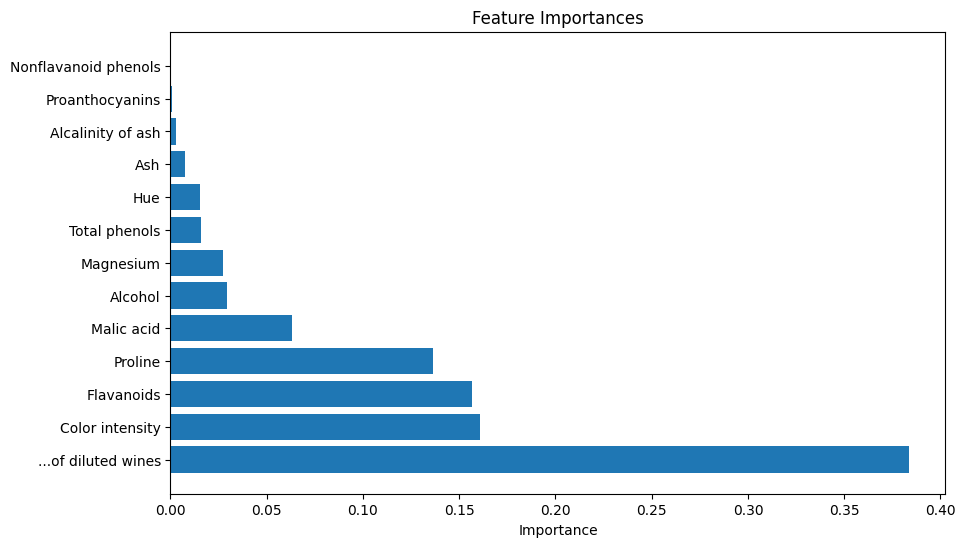

vemos que la caracteristica ...of diluted wines define en una proporcion muy elevada el resultado de la prediccion


In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()
print('vemos que la caracteristica ...of diluted wines define en una proporcion muy elevada el resultado de la prediccion' )




In [ ]:
#voy a eliminar la columna .... of diluted wines para ver si mejora la prediccion

x3=df.drop(['Wine','...of diluted wines'], axis=1)
y3=df['Wine']


y3=y3-1   #las etiquetas son 0,1,2, por ello resto 1 para que empiece por 0
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3, random_state=42)
num_classes = len(set(y3))       #es el numero unico de clases del conjunto de y

xgboost_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=70)
xgboost_model.fit(x_train3, y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
y_pred3 = xgboost_model.predict(x_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f'Precisión del modelo XGBoost: {accuracy3}')

Precisión del modelo XGBoost: 0.9166666666666666


In [154]:
#normalizo los datos

scaler=StandardScaler()

x_train_normalized3 = scaler.fit_transform(x_train3)
x_test_normalized3 = scaler.transform(x_test3)

In [156]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)), seed=42)
xgb_model.fit(x_train_normalized3, y_train3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [162]:
y_1predic = xgb_model.predict(x_test_normalized3)


In [163]:
accuracy = accuracy_score(y_test3, y_1predic)
precision = precision_score(y_test3, y_1predic, average='micro')
recall = recall_score(y_test3, y_1predic, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9166666666666666
Precision: 0.9166666666666666
Recall: 0.9166666666666666


In [164]:
#parametrizo

param_dist = {'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)}

#creo el modelo

rf_model = RandomForestClassifier()


#creo el objeto randomizedsearchCV
rand_search = RandomizedSearchCV( rf_model, 
    param_distributions=param_dist, 
    n_iter=5,  # Número de combinaciones de hiperparámetros a probar
    cv=5,  # Número de pliegues en la validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    random_state=42)

rand_search.fit(x_train3, y_train3)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022892D97950>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228928C86D0>},
                   random_state=42, scoring='accuracy')

In [165]:
y_predd = rand_search.best_estimator_.predict(x_test3)
accuracy0=accuracy_score(y_test3, y_predd)
print("Accuracy:", accuracy0)

Accuracy: 0.9722222222222222


In [ ]:
#En conclusión:
    # Con el modelo de Random Forest, utilizando hiperparametros he llegado a una percisión del 98,148%
    # Con el modelo de XGBoots, normalizando y con hiperparametros al maximo de precisión que he llegado es al 96,03%
    # Si en el modelo de XGBoots, sacamos la columna 'of diluted wines', que es la que mas peso tiene en la predicción,
    #despues de normalizar y con hiperparametros, estariamos en una precisión del 97,22%